In [85]:
from __future__ import print_function
import datetime
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import re
import selenium
from selenium import webdriver

# ! pip install gspread_formatting
# import gspread to op google sheet
import gspread
from oauth2client.service_account import ServiceAccountCredentials

#gsprade_* for save and  get data from goole sheet
# from  import get_as_dataframe, set_with_dataframe
# from gspread_formatting.dataframe import format_with_dataframe

import requests
from bs4 import BeautifulSoup
result = requests.get('https://opendata.cwb.gov.tw/api/v1/rest/datastore/F-C0032-001?Authorization=CWB-5B414EA1-34DB-4168-8B56-7EBFE0BBACCF')

In [ ]:
list_of_dicts = result.json()

In [ ]:
w={}
w1 = {}
parameterName=[]
weather_1=[]
# time = []
for i in list_of_dicts['records']['location']:
#     print(i['locationName'])
    w[i['locationName']]={}
    for j in i['weatherElement']:
#         print(j['elementName'])
#         print(j['time'][0]['startTime'])
#         print(j['time'][0]['parameter']['parameterName'])
        
        for k in j['time']:
#             print(k['startTime'])
#             print(k['parameter']['parameterName'])
            if k['startTime'][0:16] not in w1:
                w1[k['startTime'][0:16]]=[]
                w1[k['startTime'][0:16]].append(k['parameter']['parameterName'])
            else:
                w1[k['startTime'][0:16]].append(k['parameter']['parameterName'])
            
#             parameterName=[]
#             parameterName.append(k['parameter']['parameterName'])
#             w1[k['startTime']].append(parameterName)
# #             print(data)
# #             w.append(start_time)
# #             w.append(end_time)
# #             w.append(data[0])
#             w1[start_time]=data[0]
        
    w[i['locationName']]=w1
    w1={}
# for i in weather:
for i in w.items():
    weather = []
    weather.append(i[0])
    for j in i[1].keys():
        weather.append(j)
        weather= weather + i[1][j]
    weather_1.append(weather)
print(w)
#     print(i)

In [ ]:
def save_to_gs():
        # --------------authorize google sheet---------------------
    scopes = ["https://spreadsheets.google.com/feeds"]
    credentials = ServiceAccountCredentials.from_json_keyfile_name("credentials_gs.json", scopes)
    gc = gspread.authorize(credentials)
#     sh = gc.open_by_key("1590Pln7GfV3vvcvvsRNLbMHJzM78Bmtnh9mvTpXBVi4")#juhao
#     sh = gc.open_by_key("1LMoh8cbY2-KdP40Z98DYGWs6r5Dd0aDJWSgxo2f6AII")#english word
    sh = gc.open_by_key("1VqJPzS8pA89MmzdqkYMyrROxQlNfdrtLH-XV2vNU-CU")#weather
    Sheet1 = sh.worksheet("36hr")
    return Sheet1

In [ ]:
url = 'https://www.accuweather.com/zh/tw/taipei-city/315078/hourly-weather-forecast/315078'
# headers = {'user-agent': 'Mozilla/5.0 (Macintosh Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36'}
result = requests.get(url,headers=headers)
# result = requests.get(url)
result.text

In [ ]:
sheet1 = save_to_gs()

In [ ]:
sheet1.update('A1', weather_1)

https://opendata.cwb.gov.tw/opendatadoc/MFC/D0047.pdf

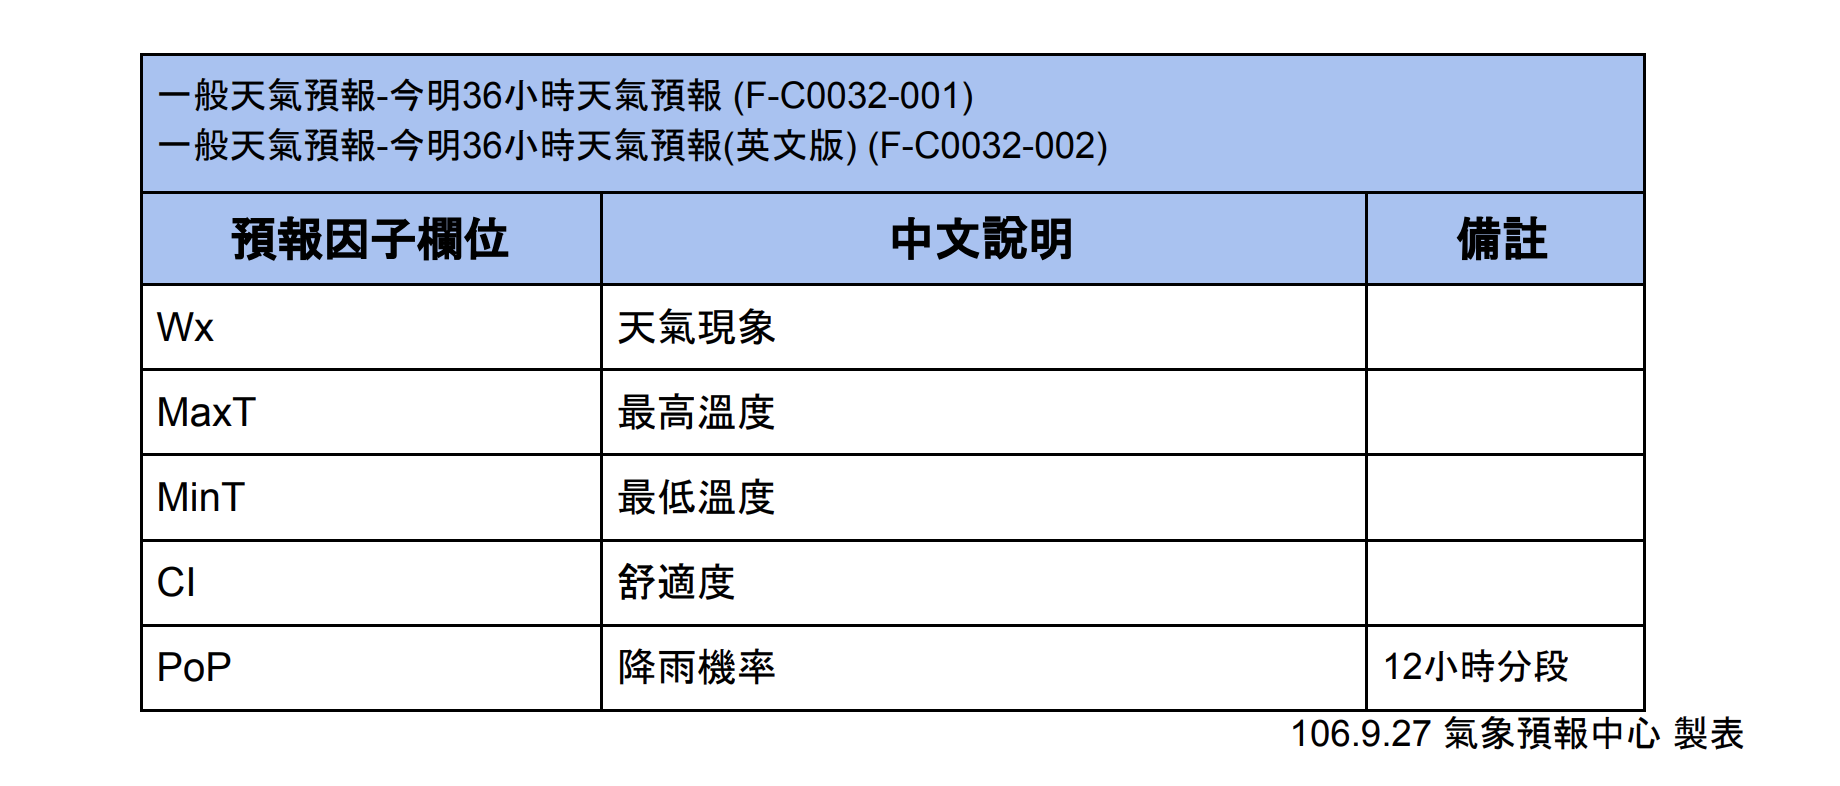

In [89]:
def geturl(url):
    # load WebDriver
    
    '''res = requests.get(url)
    res.encoding = res.apparent_encoding
    
    if res.status_code == 200:
        soup = BeautifulSoup(res.text,'html.parser')
    else:'''
#     browser = webdriver.Chrome(r'G:\我的雲端硬碟\Python\tokan and crediantials and driver\chromedriver\chromedriver_win32_89\chromedriver.exe')
    browser = webdriver.Chrome(r'G:\My Drive\Python\tokan and crediantials and driver\chromedriver\chromedriver_win32_90\chromedriver.exe')
    # load and read data from page
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,'html.parser')
    browser.close()
    #print(soup.prettify())
    return soup

In [96]:
# url = 'https://www.accuweather.com/zh/tw/taipei-city/315078/hourly-weather-forecast/315078'
url = 'https://weather.com/zh-TW/weather/hourbyhour/l/563a843c35e3c64f0c39b9aafc0285faf4ae5fd413ca4f355d7cb5ea1b1153af'
soup = geturl(url)

<body>
 <div class="appWrapper DaybreakLargeScreen LargeScreen lightTheme DaybreakLargeScreen--appWrapper--3sKDm gradients--cloudyFoggyNight--3Z9IR gradients--cloudyFoggyNight-top--3ow2Y" id="appWrapper">
  <div class="region-meta">
   <div class="removeIfEmpty" id="WxuHtmlHead-meta-">
   </div>
  </div>
  <div class="region-topAds regionTopAds DaybreakLargeScreen--regionTopAds--2bh4V">
   <div class="removeIfEmpty" id="WxuAd-topAds-53dce052-5465-4609-a555-c3a20ab64ab0">
    <div class="adWrapper BaseAd--adWrapper--2_t07 BaseAd--card---Omy- BaseAd--hide--_au39">
     <div class="adLabel">
      Advertisement
     </div>
     <div class="ad_module BaseAd--ad_module--iBlaA subs-undefined BaseAd--placeholder--jHIDq" id="WX_Hidden">
     </div>
    </div>
   </div>
  </div>
  <div class="region-header regionHeader gradients--cloudyFoggyNight-top--3ow2Y" id="regionHeader">
   <div class="removeIfEmpty" id="WxuHeaderLargeScreen-header-9944ec87-e4d4-4f18-b23e-ce4a3fd8a3ba">
    <header aria-l
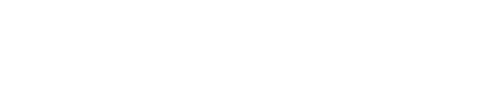
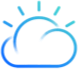

In [97]:
print(soup.body.prettify())

In [19]:
soup.find('h2','class'="accordion-item-header-container")

In [105]:
soup.select(".DetailsSummary--daypartName--1Mebr")

[<h2 class="DetailsSummary--daypartName--1Mebr" data-testid="daypartName">23:00</h2>,
 <h2 class="DetailsSummary--daypartName--1Mebr" data-testid="daypartName">00:00</h2>,
 <h2 class="DetailsSummary--daypartName--1Mebr" data-testid="daypartName">01:00</h2>,
 <h2 class="DetailsSummary--daypartName--1Mebr" data-testid="daypartName">02:00</h2>,
 <h2 class="DetailsSummary--daypartName--1Mebr" data-testid="daypartName">03:00</h2>,
 <h2 class="DetailsSummary--daypartName--1Mebr" data-testid="daypartName">04:00</h2>,
 <h2 class="DetailsSummary--daypartName--1Mebr" data-testid="daypartName">05:00</h2>,
 <h2 class="DetailsSummary--daypartName--1Mebr" data-testid="daypartName">06:00</h2>,
 <h2 class="DetailsSummary--daypartName--1Mebr" data-testid="daypartName">07:00</h2>,
 <h2 class="DetailsSummary--daypartName--1Mebr" data-testid="daypartName">08:00</h2>,
 <h2 class="DetailsSummary--daypartName--1Mebr" data-testid="daypartName">09:00</h2>,
 <h2 class="DetailsSummary--daypartName--1Mebr" data-t

In [106]:
soup.select(".DetailsSummary--tempValue--RcZzi")

[<span class="DetailsSummary--tempValue--RcZzi" data-testid="TemperatureValue">23°</span>,
 <span class="DetailsSummary--tempValue--RcZzi" data-testid="TemperatureValue">23°</span>,
 <span class="DetailsSummary--tempValue--RcZzi" data-testid="TemperatureValue">23°</span>,
 <span class="DetailsSummary--tempValue--RcZzi" data-testid="TemperatureValue">24°</span>,
 <span class="DetailsSummary--tempValue--RcZzi" data-testid="TemperatureValue">23°</span>,
 <span class="DetailsSummary--tempValue--RcZzi" data-testid="TemperatureValue">23°</span>,
 <span class="DetailsSummary--tempValue--RcZzi" data-testid="TemperatureValue">23°</span>,
 <span class="DetailsSummary--tempValue--RcZzi" data-testid="TemperatureValue">23°</span>,
 <span class="DetailsSummary--tempValue--RcZzi" data-testid="TemperatureValue">25°</span>,
 <span class="DetailsSummary--tempValue--RcZzi" data-testid="TemperatureValue">27°</span>,
 <span class="DetailsSummary--tempValue--RcZzi" data-testid="TemperatureValue">29°</span>,

In [110]:
for i in soup.select('span'+".DetailsSummary--extendedData--aaFeV"):
    print(i.text)

局部多雲
局部多雲
局部多雲
局部多雲
局部多雲
局部多雲
局部多雲
局部多雲
局部多雲
局部多雲
局部多雲
局部多雲
局部多雲
局部多雲
局部雷雨
零星雷雨
零星雷雨
零星雷雨
多雲時晴
多雲時晴
多雲時晴
零星雷雨
零星雷雨
零星雷雨
零星雷雨
多雲時晴
多雲時晴
多雲時晴
多雲時晴
多雲
多雲
多雲
多雲
多雲時晴
多雲
多雲
零星雷雨
零星雷雨
雷雨
雷雨
雷雨
雷雨
零星雷雨
零星雷雨
零星雷雨
零星雷雨
零星雷雨
多雲時晴
